<font size="10" color="purple"><left><b><i><u>Exploratory Data Analysis #3</u></i></b></left></font>

<font size="4"><li><left><i>Instanciamos clase EDA con los métodos necesarios</i></left></font>


In [285]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
#import pandas_profiling as pdpf
from IPython.display import HTML
#import sweetviz as sv

class EDA:
    def read_csv(self, file_path):
        """
        Lee un archivo CSV y devuelve un dataframe.

        Args:
            file_path (str): Ruta al archivo CSV a leer.

        Returns:
            pd.DataFrame: El dataframe con los datos del archivo CSV.
        """
        dataframe = pd.read_csv(file_path,encoding='UTF-8')
        return dataframe

    def get_columnas(self, dataframe):
        """
        Obtiene una lista de las columnas de un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe del cual se desean obtener las columnas.

        Returns:
            list: Lista de las columnas del dataframe.
        """
        columnas = dataframe.columns.tolist()
        return columnas

    def set_columns_dtype_category(self, dataframe, columnas):
        """
        Asigna el tipo de dato "category" a una lista de columnas en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "category".
        """
        dataframe[columnas] = dataframe[columnas].astype('category')

    def set_columns_dtype_int(self, dataframe, columnas):
        """
        Asigna el tipo de dato "int" a una lista de columnas en un dataframe.
        Los valores nulos en las columnas seleccionadas se reemplazan por 0.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "int".
        """
        dataframe[columnas] = dataframe[columnas].astype(int).fillna(0)

    def set_columns_dtype_float(self, dataframe, columnas):
        """
        Asigna el tipo de dato "float" a una lista de columnas en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "float".
        """
        dataframe[columnas] = dataframe[columnas].astype(float)

    def set_columns_dtype_datetime(self, dataframe, columnas, formato='%Y-%m-%d'):
        """
        Asigna el tipo de dato "datetime" a una lista de columnas en un dataframe, con el formato especificado.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "datetime".
            formato (str): El formato de fecha a utilizar (por defecto: "%Y-%m-%d").
        """
        dataframe[columnas] = pd.to_datetime(dataframe[columnas], format=formato)

    def rename_columns(self, dataframe, column_mapping):
        """
        Modifica los nombres de las columnas de un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se le van a modificar los nombres de las columnas.
            column_mapping (dict): Un diccionario que contiene el mapeo de los nombres actuales de las columnas a los nuevos nombres.

        Returns:
            pd.DataFrame: El dataframe con los nombres de columnas modificados.
        """
        dataframe.rename(columns=column_mapping, inplace=True)
        return dataframe

    def get_duplicate_rows(self, dataframe, column):
        """
        Devuelve las filas del dataframe que tienen valores repetidos en una columna específica,
        junto con la cantidad de repeticiones y el porcentaje respecto al total de líneas.

        Args:
            dataframe (pd.DataFrame): El dataframe a analizar.
            column (str): El nombre de la columna en la cual buscar repeticiones.

        Returns:
            pd.DataFrame: Un dataframe con las filas que se repiten, la cantidad de repeticiones
                        y el porcentaje respecto al total de líneas.
        """
        duplicated_rows = dataframe[dataframe.duplicated(subset=column, keep=False)]
        duplicated_counts = duplicated_rows[column].value_counts().reset_index()
        duplicated_counts.columns = [column, 'Cantidad']
        duplicated_counts['Porcentaje'] = duplicated_counts['Cantidad'] / len(dataframe) * 100
        return duplicated_counts
    
    def get_duplicate_rows_2(self, dataframe, column):
        """
        Devuelve las filas del dataframe que tienen valores repetidos en una columna específica.
        Incluye las otras columnas del dataframe, la cantidad y el porcentaje de filas duplicadas.
        Ordena el resultado por los valores de la columna especificada.

        Args:
            dataframe (pd.DataFrame): El dataframe a analizar.
            column (str): El nombre de la columna en la que se buscarán valores duplicados.

        Returns:
            pd.DataFrame: El dataframe con las filas duplicadas, incluyendo las otras columnas,
                        la cantidad y el porcentaje de filas duplicadas. Ordenado por la columna especificada.
        """
        duplicates = dataframe[dataframe.duplicated(subset=column, keep=False)]
        duplicate_counts = duplicates[column].value_counts()
        duplicate_percentages = duplicate_counts / len(dataframe) * 100

        duplicates['Duplicate Count'] = duplicates[column].map(duplicate_counts)
        duplicates['Duplicate Percentage'] = duplicates[column].map(duplicate_percentages)

        duplicates = duplicates.sort_values(by=column)

        return duplicates

    def strip_column_values(self, dataframe, column_names):
        """
        Elimina los espacios en blanco al inicio y al final de los valores de las filas de las columnas especificadas.

        Args:
            dataframe (pd.DataFrame): El dataframe en el cual se van a limpiar los valores de las columnas.
            column_names (list): Una lista de nombres de columnas a las cuales se les va a aplicar el método .strip().

        Returns:
            pd.DataFrame: El dataframe con los valores de las filas de las columnas especificadas limpios de espacios en blanco.
        """
        for column in column_names:
            dataframe[column] = dataframe[column].str.strip()
        return dataframe

    def sort_dataframe(self, dataframe, column, order='a'):
        """
        Ordena un dataframe por una columna especificada.

        Args:
            dataframe (pd.DataFrame): El dataframe a ordenar.
            column (str): El nombre de la columna por la cual ordenar el dataframe.
            order (str, opcional): El orden de clasificación. 'a' para ascendente (predeterminado),
                'd' para descendente.

        Returns:
            pd.DataFrame: El dataframe ordenado por la columna especificada.
        """
        if order == 'd':
            dataframe = dataframe.sort_values(column, ascending=False)
        else:
            dataframe = dataframe.sort_values(column)

        return dataframe

    def sort_and_replace(self, dataframe, column1, column2):
        """
        Ordena un dataframe de menor a mayor según los valores de una columna y reemplaza los valores de otra columna por enteros.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            column1 (str): El nombre de la primera columna según la cual se va a ordenar el dataframe.
            column2 (str): El nombre de la segunda columna cuyos valores se reemplazarán por enteros.

        Returns:
            pd.DataFrame: El dataframe ordenado y con los valores de la segunda columna reemplazados por enteros.
        """
        # Ordenar dataframe por la columna 1 de menor a mayor
        dataframe = dataframe.sort_values(by=column1)

        # Reemplazar los valores de la columna 2 por enteros
        dataframe[column2] = range(len(dataframe))

        return dataframe
        
    def convert_date_format(self, dataframe, columns):
        """
        Convierte el formato de fecha de columnas en un dataframe de 'MMM DD, YYYY' a 'YYYY-MM-DD'
        y asigna el dtype datetime a las columnas especificadas.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            columns (list): Una lista de nombres de columnas a convertir y asignar el dtype datetime.

        Returns:
            pd.DataFrame: El dataframe con los formatos de fecha modificados y dtype datetime asignado.
        """
        for column in columns:
            dataframe[column] = pd.to_datetime(dataframe[column], format='%b %d, %Y').dt.strftime('%Y-%m-%d')
            dataframe[column] = pd.to_datetime(dataframe[column])
            
        return dataframe

    def remove_prefix(self, dataframe, column, prefix):
        """
        Elimina un prefijo de las filas de una columna en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            column (str): El nombre de la columna en la que se eliminará el prefijo.
            prefix (str): El prefijo a eliminar de las filas de la columna.

        Returns:
            pd.DataFrame: El dataframe con el prefijo eliminado de las filas de la columna especificada.
        """
        dataframe[column] = dataframe[column].str.lstrip(prefix)
        return dataframe
    
    def transform_values(self, dataframe, columns, symbols):
        """
        Transforma los valores de las columnas especificadas en el dataframe, eliminando símbolos, realizando un strip y convirtiendo a minúscula.

        Args:
            dataframe (pd.DataFrame): El dataframe a transformar.
            columns (list): La lista de nombres de columnas a transformar.
            symbols (list): La lista de símbolos a eliminar.

        Returns:
            pd.DataFrame: El dataframe con los valores transformados.
        """
        for column in columns:
            for symbol in symbols:
                dataframe[column] = dataframe[column].str.replace(symbol, '')
            dataframe[column] = dataframe[column].str.strip().str.lower()

        return dataframe

    def replace_na_values_obj(self, dataframe, columns, replacement):
        """
        Reemplaza los valores NaN en las columnas especificadas del dataframe con un valor de reemplazo.

        Args:
            dataframe (pd.DataFrame): El dataframe en el que se reemplazarán los valores NaN.
            columns (list): La lista de nombres de columnas en las que se realizará el reemplazo.
            replacement (str): El valor de reemplazo para los valores NaN.

        Returns:
            pd.DataFrame: El dataframe con los valores NaN reemplazados.
        """
        dataframe[columns] = dataframe[columns].fillna(replacement)
        return dataframe

    def convert_values_to_int(self,dataframe, columns, str_to_remove):
        """
        Convierte los valores de las columnas seleccionadas del dataframe en enteros.

        Los valores de las columnas seleccionadas que contengan el str indicado se eliminan.
        Los valores restantes se convierten a enteros.

        Args:
            dataframe (pd.DataFrame): El dataframe original.
            columns (list): Lista de nombres de columnas a modificar.
            str_to_remove (str): El str a eliminar de los valores de las columnas.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a enteros.
        """
        for column in columns:
            dataframe[column] = dataframe[column].str.replace(str_to_remove, '')
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').astype(pd.Int64Dtype())

        return dataframe

    def convert_values_to_float(self,dataframe, columns, str_to_remove):
        """
        Convierte los valores de las columnas seleccionadas del dataframe en flotantes.

        Los valores de las columnas seleccionadas que contengan el str indicado se eliminan.
        Los valores restantes se convierten a flotantes.

        Args:
            dataframe (pd.DataFrame): El dataframe original.
            columns (list): Lista de nombres de columnas a modificar.
            str_to_remove (str): El str a eliminar de los valores de las columnas.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a flotantes.
        """
        for column in columns:
            dataframe[column] = dataframe[column].str.replace(str_to_remove, '')
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').astype(float())

        return dataframe

    def plot_histogram(self, dataframe, column):
        """
        Crea un histograma utilizando countplot para una columna dada en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe del que se extraen los datos.
            column (str): El nombre de la columna para el histograma.
        """
        sns.countplot(data=dataframe, x=column)
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        
        # Calcular los porcentajes de cada categoría
        total_count = len(dataframe)
        ax = plt.gca()
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
        
        # Formatear el eje y para mostrar porcentajes
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/total_count)))
        
        # Mostrar la imagen en el entorno de ejecución de Jupyter Notebook
        plt.show()
    
    def drop_columns(self, dataframe, column):
        """
        Elimina las columnas especificadas del DataFrame.

        Args:
            column_names (list): Lista de nombres de columnas a eliminar.
        """
        for column_name in column:
            if column_name in dataframe.columns:
                dataframe = dataframe.drop(column_name, axis=1)
            else:
                print(f"La columna '{column_name}' no existe en el DataFrame. Se omitirá.")
        return dataframe

    def replace_null_values(self, dataframe):
        """
        Reemplaza los valores nulos en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea reemplazar los valores nulos.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores nulos reemplazados.
        """
        dataframe = dataframe.fillna({
            column: '' if dtype == 'object' else 0
            for column, dtype in dataframe.dtypes.items()
        })
        return dataframe
    
    def transform_columns_to_int(self,dataframe, columns):
        """
        Transforma las columnas indicadas de un dataframe a tipo entero (int) y reemplaza los valores nulos por 0.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea aplicar la transformación.
            columns (list): La lista de nombres de columna a transformar.

        Returns:
            pd.DataFrame: El dataframe modificado con las columnas transformadas a tipo entero y los valores nulos reemplazados por 0.
        """
        for column in columns:
            dataframe[column] = dataframe[column].fillna(0).astype(int)
        return dataframe

    def convert_column_to_int(self, dataframe, column_name):
        """
        Convierte los valores de una columna en un dataframe a enteros, después de eliminar los caracteres no numéricos.

        Args:
            dataframe (pd.DataFrame): El dataframe que contiene la columna.
            column_name (str): El nombre de la columna a convertir.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a enteros.
        """
        dataframe[column_name] = dataframe[column_name].str.replace(r'\D+', '', regex=True)
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce').astype(pd.Int64Dtype())

        return dataframe

    def replace_values(self, dataframe, column_name, replace_dict):
        """
        Reemplaza los valores de una columna en un dataframe utilizando un diccionario de búsqueda y reemplazo.

        Args:
            dataframe (pd.DataFrame): El dataframe en el que se desea reemplazar los valores.
            column_name (str): El nombre de la columna en la que se desea realizar el reemplazo.
            replace_dict (dict): Un diccionario que contiene los caracteres a buscar como claves y los caracteres
                                de reemplazo como valores.

        Returns:
            pd.DataFrame: El dataframe con los valores de la columna reemplazados.
        """
        dataframe[column_name] = dataframe[column_name].replace(replace_dict, regex=True)
        return dataframe

    def extract_average_value(self, dataframe, column):
        """
        Extrae el valor promedio de un rango numérico en una columna del dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe que contiene la columna.
            column (str): El nombre de la columna a transformar.

        Returns:
            pd.DataFrame: El dataframe con los valores modificados en la columna seleccionada.
        """
        # Expresión regular para buscar el rango numérico
        pattern = r"(\d+)[^\d]+(\d+)"
        
        # Función para calcular el promedio de los valores en el rango
        def calculate_average(match):
            num1 = int(match.group(1))
            num2 = int(match.group(2))
            average = (num1 + num2) / 2
            return str(average)
        
        # Aplicar la transformación a la columna
        dataframe[column] = dataframe[column].apply(lambda x: re.sub(pattern, calculate_average, x) if pd.notnull(x) else x)
        
        return dataframe



# Instancia de la clase EDA
eda = EDA()

<font size="4"><li><left><i>Exportamos edx_courses.csv a dataframe</i></left></font>

In [2]:
# Path de archivos CSV (MacOS)
path = '/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/rawDataSets/edx_courses.csv'

# Leer y almacenar los archivos CSV en dataframes
edx_courses = eda.read_csv(path)

In [265]:
# Path de archivos CSV (Windows)
path = "C:\\Users\\Francisco\\OneDrive\\Documentos\\00 Fran\\01 - Personales\\02-Learn\\0. Data Science\\0. Data Science\\2_projects\\e_MOOCs\\2_Repo\\MOOCs_BA\\rawDataSets\\edx_courses.csv"

# Leer y almacenar los archivos CSV en dataframes
edx_courses = eda.read_csv(path)

<font size="4"><li><left><i>Obtenemos información del dataframe</i></left></font>

In [36]:
# Generar el perfil del dataframe con pandas profiling
profile = edx_courses.profile_report(title='Informe de Pandas-Profiling', explorative=True)
# Guardar el informe en un archivo HTML
profile.to_file('/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/reports/edx_courses.html')
# Cargar y mostrar el informe HTML
report_html = open('/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/reports/edx_courses.html', 'r').read()
display(HTML(report_html))


AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [243]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [244]:
# Obtener cabecera del dataframe
edx_courses.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


In [245]:
eda.get_duplicate_rows(edx_courses, 'language')

,language,Cantidad,Porcentaje
0,English,777,79.692308
1,Español,176,18.051282
2,Français,7,0.717949
3,Italiano,4,0.410256
4,中文,4,0.410256
5,Português,4,0.410256


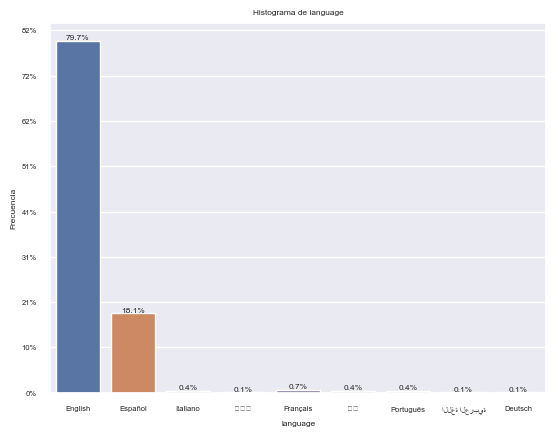

In [246]:
eda.plot_histogram(edx_courses,'language')

<font size="4"><li><left><i>Alta frecuencia de cursos en `English` con un `79,7%`, seguido de `Español` con `18,1%`. El resto de los los idiomas de los cursos sólo representan un `2,2%`.</i></left></font>

<font size="4"><li><left><i>Analizamos duplicados en `title`:</i></left></font>

In [247]:
eda.get_duplicate_rows_2(edx_courses, 'title')

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,Duplicate Count,Duplicate Percentage
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...,NaN,https://www.edx.org/course/introduction-to-mar...,2,0.205128
561,Introduction to Marketing,An introduction to the role of marketing in a ...,NaN,Self-paced on your time,The University of Edinburgh,Ewelina Lacka-Malcolm Kirkup-Asanka de Silva-A...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,Do you want to learn how successful businesses...,NaN,https://www.edx.org/course/introduction-to-mar...,2,0.205128
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...,2,0.205128
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...,2,0.205128
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Ashis Mishra,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...,NaN,https://www.edx.org/course/marketing-management,2,0.205128
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Judy Frels-David Godes-P.K. Kannan-Mary Beth F...,Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put...",NaN,https://www.edx.org/course/marketing-management-2,2,0.205128


<font size="4"><li><left><i>Se identifican que solo los `title` correspondiente a `Introduction to Probability` son efectivamente iguales y se eliminan duplicados:</i></left></font><br>

In [266]:
# Lista de indices a eliminar
index_list = [95]

edx_courses = edx_courses.drop(index_list).reset_index(drop=True)

<font size="4"><li><left><i>Se identifican valores null en este dataset en columnas del tipo `object` e `int`.</i></left></font><br>

In [267]:
# Convertimos a int la columna 'n_enrolled', eliminando la coma de miles:
edx_courses = eda.convert_values_to_int(edx_courses,['n_enrolled'],',')

In [268]:
# Reemplazamos valores nulos
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].fillna(0)

In [269]:

edx_courses = eda.replace_na_values_obj(edx_courses,['summary', 'instructors','subtitles','course_description', 'course_syllabus'],'')

<font size="4"><li><left><i>Clasificamos variables y renombramos algunas para mantener consistencia con el resto de los datasets:</i></left></font>

In [270]:
# Obtener lista de columnas
columnas = eda.get_columnas(edx_courses)
print(columnas)

['title', 'summary', 'n_enrolled', 'course_type', 'institution', 'instructors', 'Level', 'subject', 'language', 'subtitles', 'course_effort', 'course_length', 'price', 'course_description', 'course_syllabus', 'course_url']


In [271]:
# Reembramos columna 'course_url' 'Level' y 'n_enrolled'
# Definir un diccionario de mapeo de nombres de columnas
column_mapping = {'course_url':'url', 'Level':'level', 'n_enrolled': 'num_subscribers'}

# Llamar al método rename_columns
edx_courses = eda.rename_columns(edx_courses, column_mapping)

<font size="4"><li><left><i>Definimos variables cualitativas:</i></left></font><br>
<br>
<font size="4"><left><i>- Ordinales: `level` y `course_effort`</i></left></font><br>
<br>
<font size="4"><left><i>- Nominales: `title`, `summary`, `course_type`, `institution`, `instructors`, `subject`, `language`, `subtitles`, `course_description`, `course_syllabus` y `course_url`</i></left></font><br>
<br>
<font size="4"><li><left><i>Definimos variables cuantitativas:</i></left></font><br>
<br>
<font size="4"><left><i>- Discretas: `n_enrolled` </i></left></font><br>
<br>
<font size="4"><left><i>- Continuas: `price` y `course_length`</i></left></font><br>
<br>
<br><font size="4"><li><left><i>PK:</i></left></font><br>
<br>
<font size="4"><left><i>- Debemos crear `course_id` una vez tengamos el conjunto de dataset unificado</i></left></font><br>


<font size="4" color="white"><li><left><i>Eliminamos columnas `subtitle`, `instructor`, `course_description` y `course_syllabus` ya que no las necesitaremos para el cruce con el resto de los datasets: </i></left></font>

In [288]:
# Lista de columnas a eliminar
drop_columns = ['instructors','subtitles','course_description','course_syllabus','summary']
# Guardamos el dataframe sin la columna elegida
edx_courses = eda.drop_columns(edx_courses,drop_columns)
edx_courses.head(10)

La columna 'instructors' no existe en el DataFrame. Se omitirá.
La columna 'subtitles' no existe en el DataFrame. Se omitirá.
La columna 'course_description' no existe en el DataFrame. Se omitirá.
La columna 'course_syllabus' no existe en el DataFrame. Se omitirá.
La columna 'summary' no existe en el DataFrame. Se omitirá.


,title,num_subscribers,course_type,institution,level,subject,language,course_effort,course_length,price,url
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2.5,2,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,3.0,7,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,English,12.0,12,FREE-Add a Verified Certificate for $90 USD,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,12.5,13,FREE-Add a Verified Certificate for $199 USD,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,6.0,4,FREE-Add a Verified Certificate for $249 USD,https://www.edx.org/course/marketing-analytics...
5,Introduction to Project Management,301793,Self-paced on your time,University of Adelaide,Introductory,Business & Management,English,2.5,6,FREE-Add a Verified Certificate for $199 USD,https://www.edx.org/course/introduction-to-pro...
6,Leading High-Performing Teams,32847,Self-paced on your time,The University of Queensland,Intermediate,Communication,English,9.0,10,FREE-Add a Verified Certificate for $5 USD,https://www.edx.org/course/leading-high-perfor...
7,The Foundations of Happiness at Work,67073,Self-paced on your time,"University of California, Berkeley",Introductory,Business & Management,English,2.5,4,FREE-Add a Verified Certificate for $199 USD,https://www.edx.org/course/the-foundations-of-...
8,"Managing Study, Stress and Mental Health at Un...",23061,Self-paced on your time,Curtin University,Introductory,Health & Safety,English,2.0,2,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/managing-study-stre...
9,Six Sigma: Define and Measure,92411,Self-paced on your time,Technische Universität München,Introductory,Business & Management,English,3.5,8,FREE-Add a Verified Certificate for $99 USD,https://www.edx.org/course/six-sigma-define-an...


In [273]:
edx_courses = eda.convert_values_to_int(edx_courses,['course_length'],' Weeks')


In [279]:
edx_courses = eda.extract_average_value(edx_courses,'course_effort')

In [287]:
edx_courses['course_effort'] = edx_courses['course_effort'].str.replace(' hours per week', '')

In [290]:
edx_courses['course_effort'] = edx_courses['course_effort'].astype(float)

<font size="4" color="white"><li><left><i>Ya con las columnas `course_effort` y `course_length` transfomradas a números, creamos la nueva columna `content_duration` que nos dara la duración del curso en horas</i></left></font>

In [293]:
edx_courses['content_duration'] = edx_courses['course_effort'] * edx_courses['course_length']

In [295]:
edx_courses = edx_courses.drop(['course_effort', 'course_length'], axis=1)

In [296]:
edx_courses.head()

,title,num_subscribers,course_type,institution,level,subject,language,price,url,content_duration
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/how-to-learn-online,5.0
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/programming-for-eve...,21.0
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,English,FREE-Add a Verified Certificate for $90 USD,https://www.edx.org/course/cs50s-introduction-...,144.0
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,FREE-Add a Verified Certificate for $199 USD,https://www.edx.org/course/the-analytics-edge,162.5
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,FREE-Add a Verified Certificate for $249 USD,https://www.edx.org/course/marketing-analytics...,24.0


<font size="4" color="white"><li><left><i>Eliminamos espacios antes/despues:</i></left></font>

In [300]:
# Eliminar espacios alrededor de str
# Definir una lista de nombres de columnas a limpiar
columnas_a_limpiar = ['title','course_type', 'institution', 'level', 'subject', 'language','price','url']

# Llamar al método strip_column_values
edx_courses = eda.strip_column_values(edx_courses, columnas_a_limpiar)

<font size="4" color="white"><li><left><i>Eliminamos valores no numéricos de `price` y lo definimos como `int`:</i></left></font>

In [301]:
edx_courses = eda.convert_column_to_int(edx_courses,'price')

In [302]:
eda.get_duplicate_rows(edx_courses, 'price')

,price,Cantidad,Porcentaje
0,49,270,27.720739
1,99,136,13.963039
2,50,96,9.856263
3,199,85,8.726899
4,149,78,8.008214
5,25,49,5.030801
6,139,33,3.38809
7,150,30,3.080082
8,249,26,2.669405
9,79,21,2.156057


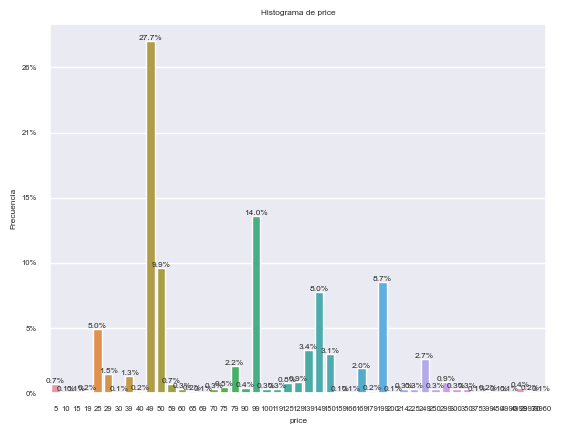

In [303]:
eda.plot_histogram(edx_courses,'price')

<font size="4"><li><left><i>El `price` que más se repite es `49` en un `27,6%`, pero se nota que hay diferencias en valores que consideraremos iguales.</i></left></font>
<br>
<br>
<font size="4"><li><left><i>Armonizamos la fila para agrupar de mejor manera:</i></left></font>

In [304]:
# Traer filas con duplicados en 'institution'
filas_duplicadas = eda.get_duplicate_rows(edx_courses, 'institution')
filas_duplicadas.head()

,institution,Cantidad,Porcentaje
0,Harvard University,103,10.574949
1,Universitat Politècnica de Valencia,47,4.825462
2,Massachusetts Institute of Technology,41,4.209446
3,IBM,30,3.080082
4,Delft University of Technology,30,3.080082


<font size="4"><li><left><i>El `title` con más `institution` es `Harvard University` con `10,6%`, esto es un `121%` más que el inmediato segundo `Universitat Politècnica de Valencia`.</i></left></font>

In [307]:
# Traer filas con duplicados en 'content_duration'
filas_duplicadas = eda.get_duplicate_rows(edx_courses, 'content_duration')
filas_duplicadas.head()

,content_duration,Cantidad,Porcentaje
0,30.0,65,6.673511
1,24.0,53,5.441478
2,21.0,50,5.13347
3,15.0,50,5.13347
4,20.0,46,4.722793


<font size="4"><li><left><i>Con el fin de obtener una duración de `course_id` homogenea, definimos la media de cada `course_effort` y dejamos la variable como `float`:</i></left></font>

In [308]:
edx_courses.describe()

,num_subscribers,price,content_duration
count,974.0,974.0,974.0
mean,46653.294661,227.404517,34.363963
std,112870.19513,1891.694683,30.81452
min,0.0,5.0,1.5
25%,8523.25,49.0,16.0
50%,19650.5,79.0,24.5
75%,48809.0,149.0,40.0
max,2442271.0,39960.0,225.0


<Axes: xlabel='price', ylabel='course_length'>

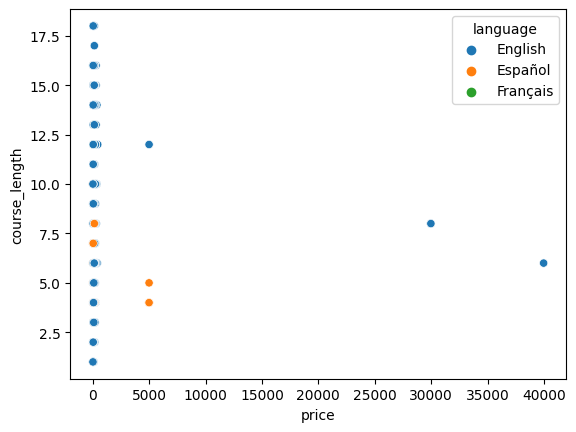

In [148]:
sns.scatterplot(x='price', y='course_length',hue='language', data=edx_courses[edx_courses['language'].isin(['English','Español','Français'])])

In [181]:
eda.get_duplicate_rows(edx_courses, 'institution')

,institution,Cantidad,Porcentaje
0,Harvard University,103,10.574949
1,Universitat Politècnica de Valencia,47,4.825462
2,Massachusetts Institute of Technology,41,4.209446
3,IBM,30,3.080082
4,Delft University of Technology,30,3.080082
...,...,...,...
89,Dartmouth College,2,0.205339
90,Red Hat,2,0.205339
91,Boston University,2,0.205339
92,Cornell University,2,0.205339


<Axes: xlabel='price', ylabel='course_length'>

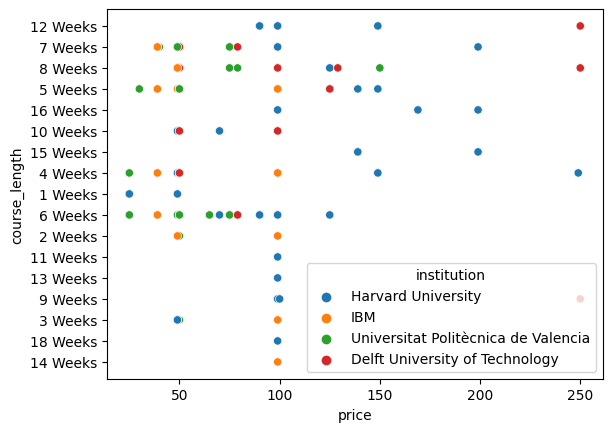

In [183]:
sns.scatterplot(x='price', y='course_length',hue='institution', data=edx_courses[edx_courses['institution'].isin(['Harvard University','Universitat Politècnica de Valencia','	Massachusetts Institute of Technology','IBM','Delft University of Technology'])])

In [198]:
# Filtro por 'institution':
filtro_institution = edx_courses[edx_courses['institution'].isin(['Harvard University','Universitat Politècnica de Valencia','Massachusetts Institute of Technology','IBM','Delft University of Technology'])]

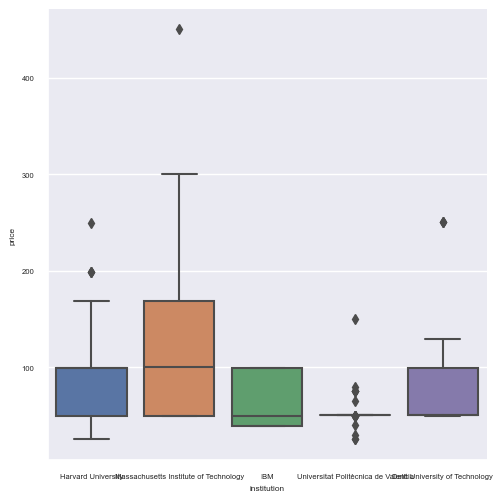

In [200]:
sns.set(font_scale=0.5)
sns.catplot(x='institution', y='price', kind='box', data=filtro_institution)

<font size="4"><li><left><i>Creamos 3 filtros para analizar la distribucion de los ´price´ y la fecuencia de los mismos según `institution`:</i></left></font>

In [205]:
harvard = edx_courses[edx_courses['institution'] == 'Harvard University']
harvard = harvard.dropna()
harvard = harvard[harvard['price'] <= 200 ]


In [ ]:
mit = edx_courses[edx_courses['institution'] == 'Massachusetts Institute of Technology']
mit = mit.dropna()
mit = mit[mit['price'] <= 200 ]

In [ ]:
upv = edx_courses[edx_courses['institution'] == 'Universitat Politècnica de Valencia']
upv = upv.dropna()
upv = upv[upv['price'] <= 200 ]

<font size="4"><li><left><i>Graficamos estas distribuciones para las 3 `institution` más recurrentes:</i></left></font>

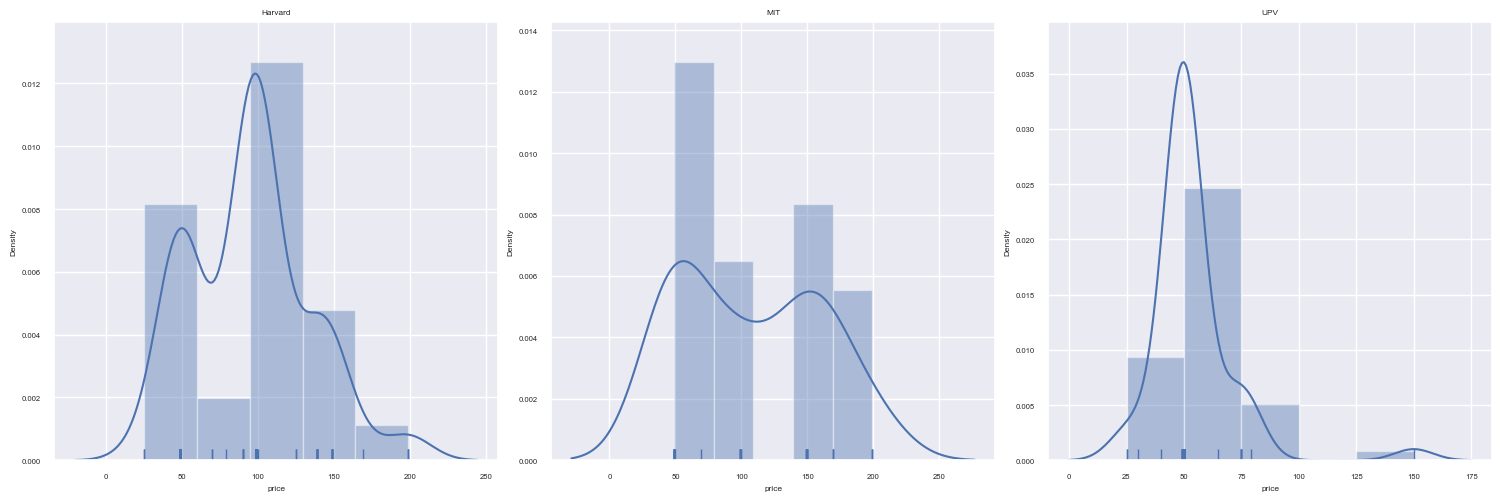

In [204]:
# Crear subplots con una fila y tres columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graficar el primer histograma
sns.distplot(harvard['price'], bins=5, rug=True, ax=axes[0])
axes[0].set_title('Harvard')

# Graficar el segundo histograma
sns.distplot(mit['price'], bins=5, rug=True, ax=axes[1])
axes[1].set_title('MIT')

# Graficar el tercer histograma
sns.distplot(upv['price'], bins=5, rug=True, ax=axes[2])
axes[2].set_title('UPV')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [212]:
edx_courses.head()

,title,summary,num_subscribers,course_type,institution,level,subject,language,course_effort,course_length,price,url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2–3 hours per week,2,49,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,2–4 hours per week,7,49,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,English,6–18 hours per week,12,90,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,10–15 hours per week,13,199,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,5–7 hours per week,4,249,https://www.edx.org/course/marketing-analytics...
